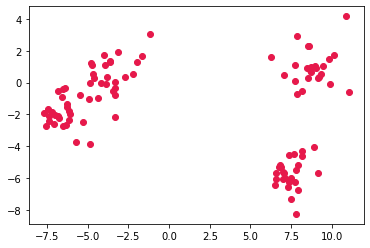

[[-3.14757769  1.914821  ]
 [-3.41838635 -0.53537184]
 [-6.27180222 -1.55218174]
 [-4.89374399 -1.04511729]
 [-7.67075987 -1.90307243]
 [ 6.76445277 -5.27514249]
 [-6.80328623 -0.4975639 ]
 [ 7.70778498  0.09337165]
 [-6.25294251 -1.34368042]
 [-7.43496615 -1.68014284]
 [-1.97430062  1.26712043]
 [ 6.50613455 -6.40359835]
 [ 7.51680826 -7.30146199]
 [10.13507716  1.72551259]
 [ 7.65674185 -4.44989576]
 [ 8.4864593   0.90683262]
 [ 7.76066702  1.09743813]
 [-4.85824375 -0.04530853]
 [ 8.19000772 -0.50345243]
 [-4.34425808 -0.96273226]
 [ 8.15477048 -4.26805245]
 [-2.69945573  0.33969784]
 [ 6.85222712 -5.28558211]
 [-3.63697253  1.28900649]
 [-6.57220221 -0.92022552]
 [ 9.31758713  0.5250675 ]
 [-5.45353078 -0.79777416]
 [-1.65255285  1.68445643]
 [-2.21318466  0.53884124]
 [ 6.59040415 -6.04234837]
 [ 7.00497713 -6.01968743]
 [ 8.62817332  0.80386815]
 [ 7.81782871 -8.23260752]
 [ 8.50606174  2.31708854]
 [-6.39748651 -0.33656625]
 [ 7.30032545 -6.53331401]
 [ 7.49376037 -6.00640168]
 

In [20]:
import numpy as np
np.set_printoptions(suppress=True)
import sys
sys.path.append('..') # append path to utils file to python path
from utils import get_classification_data, show_data, visualise_predictions, colors
import matplotlib.pyplot as plt
import sklearn.datasets
from time import sleep

#X, Y = sklearn.datasets.make_moons()
#X,Y = sklearn.datasets.make_circles(factor=0.5)
X,Y=sklearn.datasets.make_blobs(centers=4)
Y = np.zeros_like(Y)
# X, Y = get_classification_data()
show_data(X, Y)
print(X)

[1 1 1 1 1 2 1 3 1 1 1 2 2 3 2 3 3 1 3 1 2 1 2 1 1 3 1 1 1 2 2 3 2 3 1 2 2
 1 2 1 2 2 3 1 3 1 3 3 1 0 2 1 2 1 1 1 2 3 1 1 1 2 1 3 3 3 1 1 1 1 1 1 1 3
 3 3 1 1 1 2 1 3 1 2 1 3 1 2 1 1 2 3 3 3 1 1 1 2 2 2]


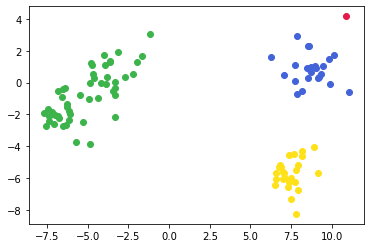

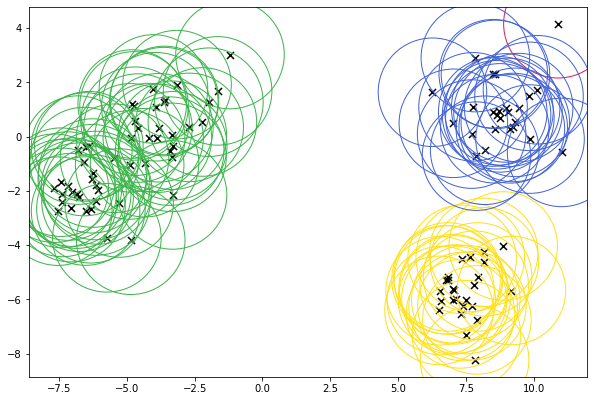

In [22]:
def compute_distances(input_X, dataset_X):
    """Takes in an array of inputs and finds each of their distances from every example in a dataset"""
    distances = np.zeros((len(input_X), len(dataset_X))) ## matrix of distances between each input x and each x in our dataset
    for i, this_x in enumerate(input_X): ## enumerate over input
        for j, another_x in enumerate(dataset_X): ## enumerate over dataset
            distance = np.linalg.norm(this_x - another_x) ## compute euclidian distance
            distances[i][j] = distance
    return distances

class DBSCAN:
    def __init__(self, epsilon, d, X):
        self.epsilon = epsilon
        self.d = d
        self.X = X
    
    def __call__(self, X):
        # Part 1: Categorising
        distances = compute_distances(X, self.X)
        counting_matrix = np.zeros_like(distances)
        counting_matrix[distances <= self.epsilon] = 1
        # for i in range(distances.shape[0]):
        #     for j in range(distances.shape[1]):
        #         if distances[i][j] < self.epsilon:
        #             counting_matrix[i][j] = 1 # capture that Xj for each Xi in counting_matrix of 1 and 0
        category_matrix = np.zeros((X.shape[0], 1))
        #print("x.shape \n", X.shape[0])

        for i in range(counting_matrix.shape[0]):
            count = np.sum(counting_matrix[i, :])
            if count >= self.d:               # if count of row in counting_matrix >= d
                category_matrix[i] = 1  # then it is core point
            elif count == 0:             # elif count of row in counting_matrix == 0
                category_matrix[i] = 3 # then it is noise point
            else: 
                category_matrix[i] = 2 # it is non-core point
       # print("category matrix", category_matrix)
        # print()

        # Part 2: Clustering
        cluster_matrix = np.zeros_like(category_matrix)
       # print("cluster matrix: \n", cluster_matrix)

        def cluster(idx, current_cluster):
            neighbours = [j for j in range(counting_matrix.shape[1]) if counting_matrix[idx][j] == 1 if not cluster_matrix[j]]  # get neigbours of core point
            cluster_matrix[idx] = current_cluster # assign to cluster
            for j in neighbours:
                cluster(j, current_cluster)
        
        current_cluster = 1
        for idx, category in enumerate(category_matrix):
             if category == 1:
                 if not cluster_matrix[idx]:
                     cluster(idx, current_cluster)
                     current_cluster += 1
        cluster_matrix=np.array([int(i) for i in cluster_matrix])
        #return cluster_matrix
        #print("Cluster matrix: \n", cluster_matrix)
        #print(list(zip(self.X,cluster_matrix)) )   
        #print(type(self.X), type(cluster_matrix))         

        # for non-core point in non-core points:
        #     if non-core not in cluster:
        #         cluster(non-core point)
        #         go to next row of cluster_matrix
        # print(cluster_matrix)
        print(cluster_matrix)
        show_data(self.X,cluster_matrix)
        return cluster_matrix

    def visualise(self, predictions):
        # Function to visualise the predictions made by DBSCAN
        plt.ion()
        plt.show()
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')

        for cluster_idx in list(set(predictions)):
            cluster_datapoints = self.X[predictions == cluster_idx]
            ax.scatter(cluster_datapoints[:, 0], cluster_datapoints[:, 1], s=50, marker='x', c='k')
            for x in cluster_datapoints:
                circle = plt.Circle((x[0], x[1]), self.epsilon, color=colors[cluster_idx], fill=False)
                ax.add_artist(circle)
        plt.show() 

db = DBSCAN(2, 3, X) #change radious from 0.1 to 2 for the blobs example
#db(X)
db.visualise(db(X))      





